In [4]:
"""
ref: 
https://m.blog.naver.com/gdpresent/221717318894

"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("dark")

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Models
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# base param
seed = 712

In [6]:
cancer = load_breast_cancer()
X_train_origin, X_test_origin, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=712)

# data normalize 진행
sc = StandardScaler()
sc.fit(X_train_origin)

X_train = sc.transform(X_train_origin)
X_test = sc.transform(X_test_origin)


for i in range(X_train.shape[1]):
    print(f"Range after normalize feature {i}'s {min(X_train_origin[:, i])} ~ {max(X_train_origin[:, i])} to {min(X_train[:, i])} ~ {max(X_train[:, i])}")

Range after normalize feature 0's 6.981 ~ 28.11 to -2.023709111635772 ~ 3.991146816473824
Range after normalize feature 1's 10.38 ~ 39.28 to -2.1202942205717465 ~ 4.697162866739091
Range after normalize feature 2's 43.79 ~ 188.5 to -1.9796847236835322 ~ 3.994892215222493
Range after normalize feature 3's 143.5 ~ 2501.0 to -1.4454253671305324 ~ 5.260337816844935
Range after normalize feature 4's 0.05263 ~ 0.1634 to -3.0854752127382876 ~ 4.721618469874036
Range after normalize feature 5's 0.01938 ~ 0.3454 to -1.6525873306558152 ~ 4.6818014778519546
Range after normalize feature 6's 0.0 ~ 0.4108 to -1.1428129281297774 ~ 4.162608769068677
Range after normalize feature 7's 0.0 ~ 0.1913 to -1.2755093081043052 ~ 3.729200191616107
Range after normalize feature 8's 0.1167 ~ 0.2906 to -2.4703038289856485 ~ 4.166039770914361
Range after normalize feature 9's 0.04996 ~ 0.09744 to -1.7971653805580423 ~ 4.824523565809539
Range after normalize feature 10's 0.1115 ~ 2.873 to -1.0561779165370946 ~ 8.86

In [7]:
def score(X_train, y_train, X_test, y_test, model):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"score - train: {train_score}, test: {test_score}")

def metrics(true_label, predict_label):
    roc = roc_auc_score(true_label, predict_label)
    f1 = f1_score(true_label, predict_label)
    print(f"test metrics - roc: {roc}, f1: {f1}")

# Decision Tree

In [8]:
tree_clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=seed)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=712)

[Text(511.5, 475.65000000000003, 'worst perimeter <= -0.033\nentropy = 0.957\nsamples = 455\nvalue = [172, 283]\nclass = benign'),
 Text(279.0, 339.75, 'worst concave points <= 0.718\nentropy = 0.292\nsamples = 273\nvalue = [14, 259]\nclass = benign'),
 Text(186.0, 203.85000000000002, 'mean texture <= 0.459\nentropy = 0.176\nsamples = 266\nvalue = [7, 259]\nclass = benign'),
 Text(93.0, 67.94999999999999, 'entropy = 0.043\nsamples = 214\nvalue = [1, 213]\nclass = benign'),
 Text(279.0, 67.94999999999999, 'entropy = 0.516\nsamples = 52\nvalue = [6, 46]\nclass = benign'),
 Text(372.0, 203.85000000000002, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = malignant'),
 Text(744.0, 339.75, 'worst perimeter <= 0.31\nentropy = 0.563\nsamples = 182\nvalue = [158, 24]\nclass = malignant'),
 Text(558.0, 203.85000000000002, 'worst smoothness <= 0.124\nentropy = 0.99\nsamples = 52\nvalue = [29, 23]\nclass = malignant'),
 Text(465.0, 67.94999999999999, 'entropy = 0.837\nsamples = 30\nvalue = [8,

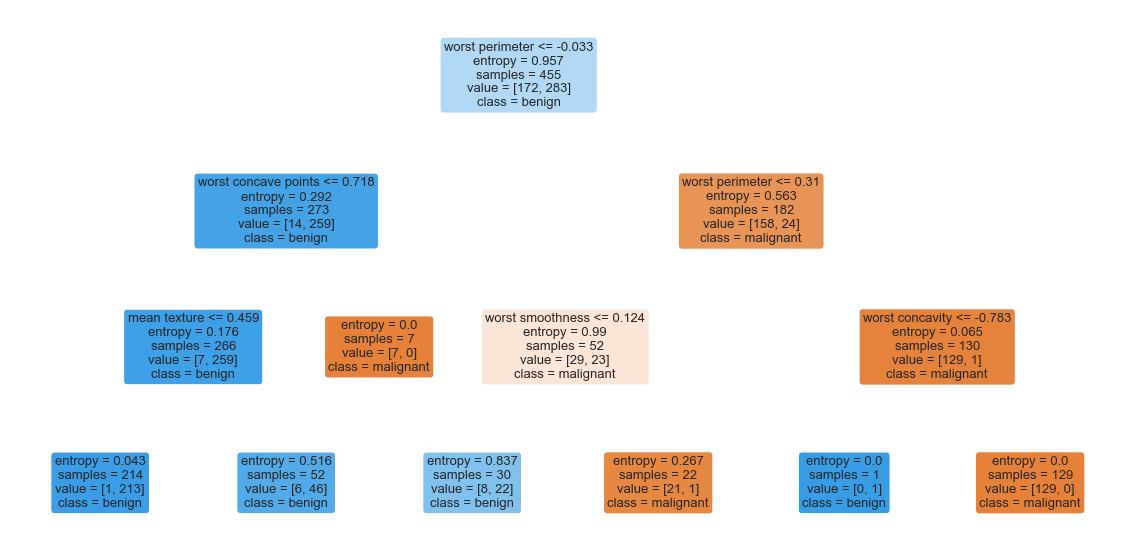

In [9]:
plt.figure( figsize=(20,10) )
tree.plot_tree(tree_clf,
               class_names=cancer.target_names,
               feature_names=cancer.feature_names,
               impurity=True, filled=True,
               rounded=True)

In [10]:
score(X_train, y_train, X_test, y_test, tree_clf)
metrics(y_test, tree_clf.predict(X_test))

score - train: 0.9648351648351648, test: 0.9473684210526315
test metrics - roc: 0.947972972972973, f1: 0.9589041095890412


In [11]:
# classification report
classification_report(y_test, tree_clf.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.90      0.95      0.93        40\n           1       0.97      0.95      0.96        74\n\n    accuracy                           0.95       114\n   macro avg       0.94      0.95      0.94       114\nweighted avg       0.95      0.95      0.95       114\n'

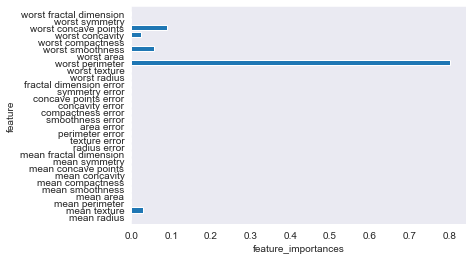

In [12]:
# feature importance

def plot_feature_importances(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),
            model.feature_importances_,
            align='center')
    plt.yticks(np.arange(n_features),
              cancer.feature_names)
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.show()
    
plot_feature_importances(tree_clf)

mean radius : 0.000
mean texture : 0.029
mean perimeter : 0.000
mean area : 0.000
mean smoothness : 0.000
mean compactness : 0.000
mean concavity : 0.000
mean concave points : 0.000
mean symmetry : 0.000
mean fractal dimension : 0.000
radius error : 0.000
texture error : 0.000
perimeter error : 0.000
area error : 0.000
smoothness error : 0.000
compactness error : 0.000
concavity error : 0.000
concave points error : 0.000
symmetry error : 0.000
fractal dimension error : 0.000
worst radius : 0.000
worst texture : 0.000
worst perimeter : 0.803
worst area : 0.000
worst smoothness : 0.056
worst compactness : 0.000
worst concavity : 0.023
worst concave points : 0.090
worst symmetry : 0.000
worst fractal dimension : 0.000


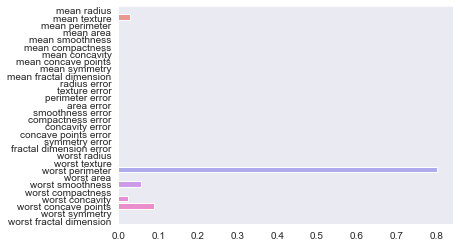

In [13]:
# feature별 importance 매핑
for name, value in zip(cancer.feature_names , tree_clf.feature_importances_):
    print('{} : {:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화 하기
sns.barplot(x=tree_clf.feature_importances_ , y=cancer.feature_names)

## Neural Network

In [14]:
nn_clf = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(10,4), random_state=seed)
nn_clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 4), random_state=712,
              solver='lbfgs')

In [15]:
nn_clf.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0])

In [16]:
# 5. weights 확인
nn_clf.coefs_

# 5. layer shape 확인
[coef.shape for coef in  nn_clf.coefs_]

[(30, 10), (10, 4), (4, 1)]

In [17]:
score(X_train, y_train, X_test, y_test, nn_clf)
metrics(y_test, nn_clf.predict(X_test))

score - train: 1.0, test: 0.956140350877193
test metrics - roc: 0.9662162162162162, f1: 0.965034965034965


## Boosting

In [18]:
ada_clf = AdaBoostClassifier(base_estimator=tree_clf,
                            n_estimators=1000,
                            learning_rate=1.,
                            random_state=seed)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=712),
                   n_estimators=1000, random_state=712)

In [19]:
score(X_train, y_train, X_test, y_test, ada_clf)
metrics(y_test, ada_clf.predict(X_test))

score - train: 1.0, test: 0.9736842105263158
test metrics - roc: 0.9739864864864864, f1: 0.979591836734694


In [20]:
grad_clf = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=10000,
    max_depth = 3, # no more than 5 usually
    max_features=0.6,
    subsample=0.7,
    random_state=seed
)
grad_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.6, n_estimators=10000,
                           random_state=712, subsample=0.7)

In [21]:
score(X_train, y_train, X_test, y_test, grad_clf)
metrics(y_test, grad_clf.predict(X_test))

score - train: 1.0, test: 0.956140350877193
test metrics - roc: 0.9662162162162162, f1: 0.965034965034965


In [22]:
grad_clf.feature_importances_

array([4.17966713e-03, 2.74241097e-02, 1.58261661e-03, 3.02581969e-03,
       6.49365278e-03, 3.55902069e-03, 1.17294513e-02, 1.37264831e-01,
       3.48360115e-03, 6.81989304e-05, 5.25647237e-03, 2.54681231e-03,
       6.99648428e-03, 1.06096090e-02, 6.69258476e-03, 2.91974651e-03,
       3.44657798e-03, 1.22259985e-03, 1.96729479e-03, 5.10271857e-03,
       7.52375379e-02, 4.27596034e-02, 3.22995344e-01, 1.03964049e-01,
       5.34284595e-03, 1.11849656e-03, 1.03022682e-02, 1.87013632e-01,
       4.23446502e-03, 1.45988773e-03])

## SVM

In [23]:
# https://idkim97.github.io/machine%20learning/MachineLearning_SVM/

svm_clf = svm.SVC(kernel='rbf', C=2, gamma=0.5) #gamma 
svm_clf.fit(X_train, y_train)

SVC(C=2, gamma=0.5)

In [24]:
score(X_train, y_train, X_test, y_test, svm_clf)
metrics(y_test, svm_clf.predict(X_test))

score - train: 1.0, test: 0.8421052631578947
test metrics - roc: 0.7807432432432433, f1: 0.8902439024390244


In [25]:
#gamma와 c를 바꿔가며 최적의 값 찾기
gamma_list = [0.5, 2, 10, 100, 100]
for gamma in gamma_list:
    svm_clf = svm.SVC(kernel='rbf', C=10, gamma=gamma) #gamma 
    svm_clf.fit(X_train, y_train)
    score(X_train, y_train, X_test, y_test, svm_clf)

score - train: 1.0, test: 0.8421052631578947
score - train: 1.0, test: 0.6491228070175439
score - train: 1.0, test: 0.6491228070175439
score - train: 1.0, test: 0.6491228070175439
score - train: 1.0, test: 0.6491228070175439


## K-NN

In [26]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
score(X_train, y_train, X_test, y_test, knn_clf)
metrics(y_test, knn_clf.predict(X_test))

score - train: 0.978021978021978, test: 0.9912280701754386
test metrics - roc: 0.9932432432432432, f1: 0.9931972789115647
